# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane had lower tumor volumes than Infubinol and Ceftamin
- The correlation between mouse weight and average tumor volume is 0.84


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(study_df["Mouse ID"].unique())

249

In [3]:
study_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
study_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_df["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
study_df.loc[study_df.duplicated()==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_info = study_df.loc[study_df["Mouse ID"] == "g989"]
dup_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
# study_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False, inplace=True, ignore_index=False)
# study_df.head()

# inplace=True modifies the data
# inplace=False creates a new copy DataFrame, would need to reassign to be able to call it again later

In [9]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_v2_df = study_df.loc[study_df["Mouse ID"] != "g989"]
study_v2_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Confirming remove duplicate by seeing 13 rows removed (1880 vs 1893)
## noting, indeces are same, we don't need to reset at this time
study_v2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [11]:
study_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [12]:
len(dup_mouse_info)

13

In [13]:
# Checking the number of mice in the clean DataFrame.
len(study_v2_df["Mouse ID"].unique())

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = study_v2_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = study_v2_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = study_v2_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_stdev = study_v2_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = study_v2_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, 
                            "Median Tumor Volume": median_tumor_volume, 
                            "Tumor Volume Variance": tumor_volume_variance, 
                            "Tumor Volume Std Dev": tumor_volume_stdev, 
                            "Tumor Volume Std Err": tumor_volume_sem
                            })

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = pd.DataFrame(study_v2_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]))
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
### Create DataFrame on drug counts to generate bar chart off of
study_counts = pd.DataFrame(study_df["Drug Regimen"].value_counts())
study_counts

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178
Propriva,161


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

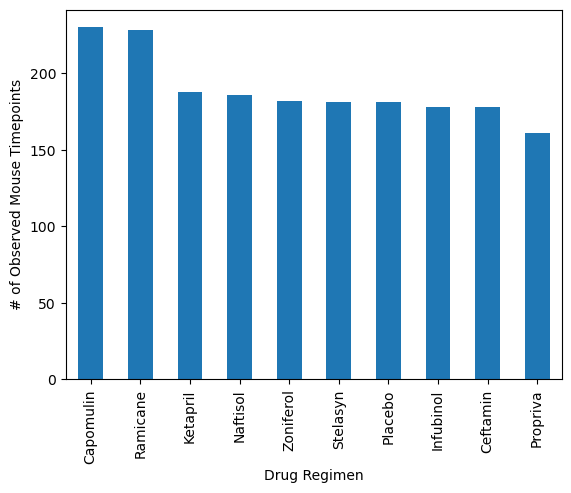

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
study_counts.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", legend=False)

Text(0, 0.5, '# of Observed Mouse Timepoints')

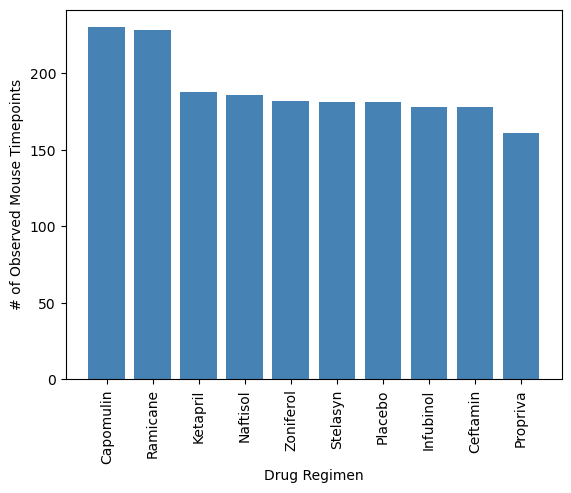

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis_bar = study_counts.index
y_axis_bar = study_counts["Drug Regimen"]

plt.bar(x_axis_bar, y_axis_bar, color="steelblue", alpha=1)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

In [19]:
### Create DataFrame on sex counts to generate pie chart off of
sex_count = study_v2_df.groupby(["Sex"])["Mouse ID"].count()

sex_df = pd.DataFrame({"Count": sex_count})

# sex_df = pd.DataFrame(study_v2_df.groupby(["Sex"])["Mouse ID"].count())
sex_df

,Count
Sex,
Female,922
Male,958


In [20]:
sex_sort_df = sex_df.sort_values("Count", ascending=False)
sex_sort_df

,Count
Sex,
Male,958
Female,922


array([<Axes: ylabel='Sex'>], dtype=object)

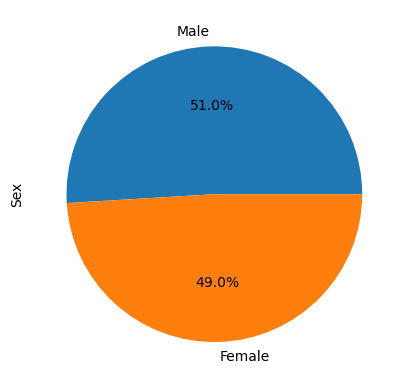

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_sort_df.plot(kind="pie", subplots=True, ylabel="Sex", legend=False, autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

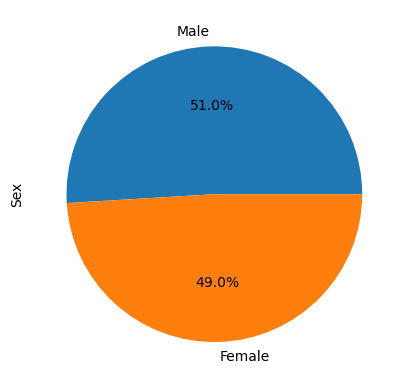

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = sex_sort_df["Count"]
labels = sex_sort_df.index
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
best_regimens_df = study_v2_df[study_v2_df["Drug Regimen"].isin(best_regimens)]
best_regimens_df

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = best_regimens_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# ltp_df = pd.DataFrame({"Last Timepoint": last_timepoint})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ltp_regimens_df = last_timepoint.merge(best_regimens_df, on=["Mouse ID","Timepoint"], how="left")
ltp_regimens_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for x in regimens:
    tumor_volume = ltp_regimens_df.loc[ltp_regimens_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]

        
    # add subset 
    
    tumor_vol_list.append(tumor_volume)

        
    # Determine outliers using upper and lower bounds

    quartiles = tumor_volume.quantile([.25, .50, .75])
        
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(f"{x}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


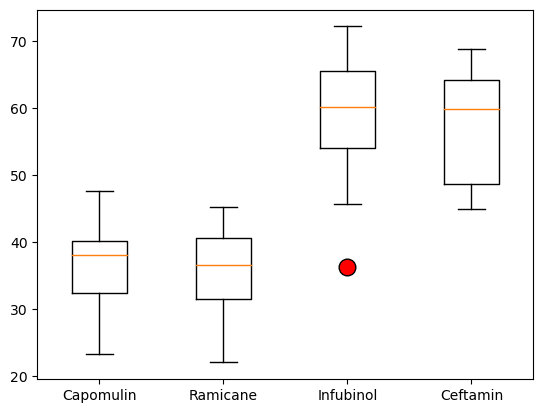

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_color = dict(markerfacecolor="red", markersize=12)
plt.boxplot(tumor_vol_list, labels=regimens, flierprops=outlier_color)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

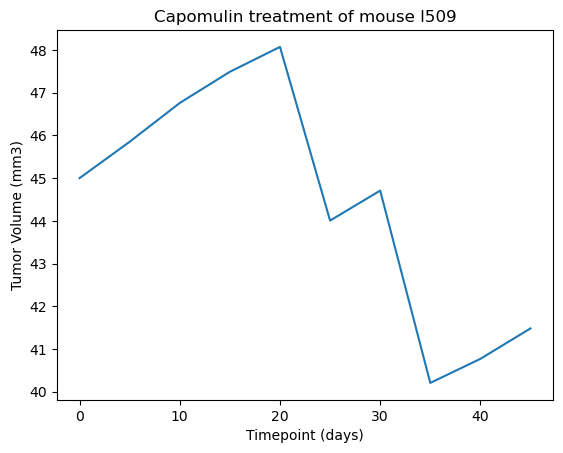

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = study_v2_df.loc[study_v2_df["Mouse ID"] == "l509", "Timepoint"]
y_axis = study_v2_df.loc[study_v2_df["Mouse ID"] == "l509", "Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

In [27]:
## filter for Drug Regimen = Capomulin
capomulin_df = study_v2_df.loc[study_v2_df["Drug Regimen"] == "Capomulin"]

## groupby Mouse ID and return averages to find average tumor volumes
cap_avg_df = capomulin_df.groupby(["Mouse ID"]).mean()
cap_avg_df.head()


/var/folders/h7/bxg17x4j6zq983g2jybk3dqw0000gp/T/ipykernel_34068/1350701740.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_avg_df = capomulin_df.groupby(["Mouse ID"]).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

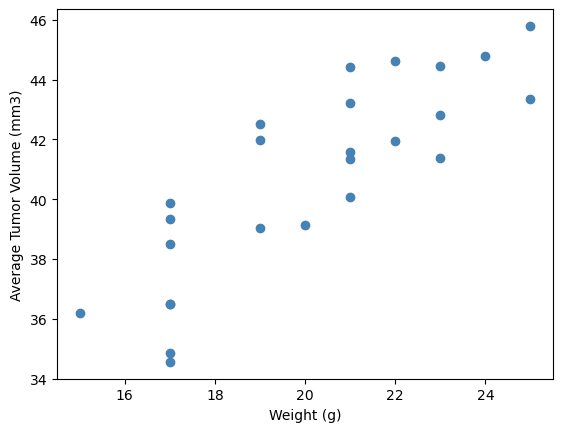

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_values = cap_avg_df["Weight (g)"]
y_values = cap_avg_df["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", facecolor="steelblue")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


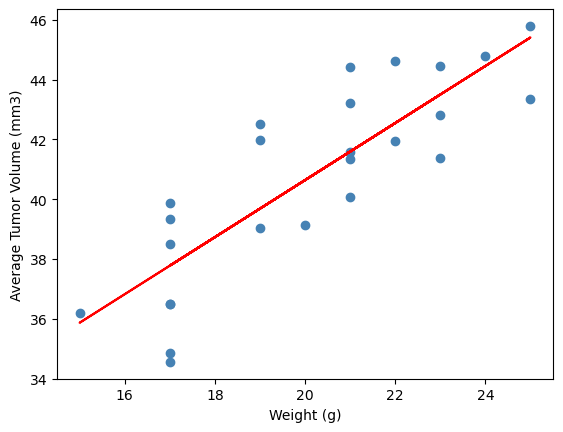

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, marker="o", facecolor="steelblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()